In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Data Preparation

## Load Dataset & Initial Inspection

In [83]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [85]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Cleaning

In [86]:
print("Missing Values:\n", df.isnull().sum())
print("\nJumlah Duplikasi:", df.duplicated().sum())

# Jika ada duplikasi → hapus
df.drop_duplicates(inplace=True)

Missing Values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Jumlah Duplikasi: 0


## Validation

In [87]:
# Deteksi nilai medis yang tidak masuk akal
print("RestingBP == 0 :", df[df['RestingBP'] == 0].shape[0])
print("Cholesterol == 0 :", df[df['Cholesterol'] == 0].shape[0])

RestingBP == 0 : 1
Cholesterol == 0 : 172


In [88]:
# Perbaiki nilai anomali -> ganti median sesuai domain klinis
df.loc[df['RestingBP'] == 0, 'RestingBP'] = df['RestingBP'].median()
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = df['Cholesterol'].median()

# Exploratory Data Analysis (EDA)

In [89]:
print("Shape:", df.shape)

Shape: (918, 12)


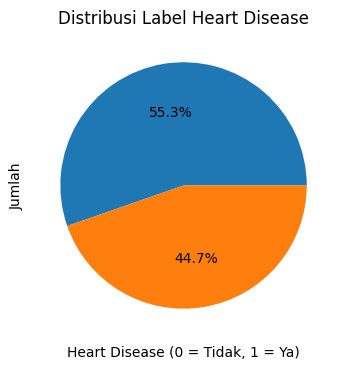

In [90]:
# Distribusi Target (Heart Disease)
plt.figure(figsize=(6,4))
plt.pie(x=df['HeartDisease'].value_counts(), autopct="%0.1f%%")
plt.title("Distribusi Label Heart Disease")
plt.xlabel("Heart Disease (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah")
plt.show()

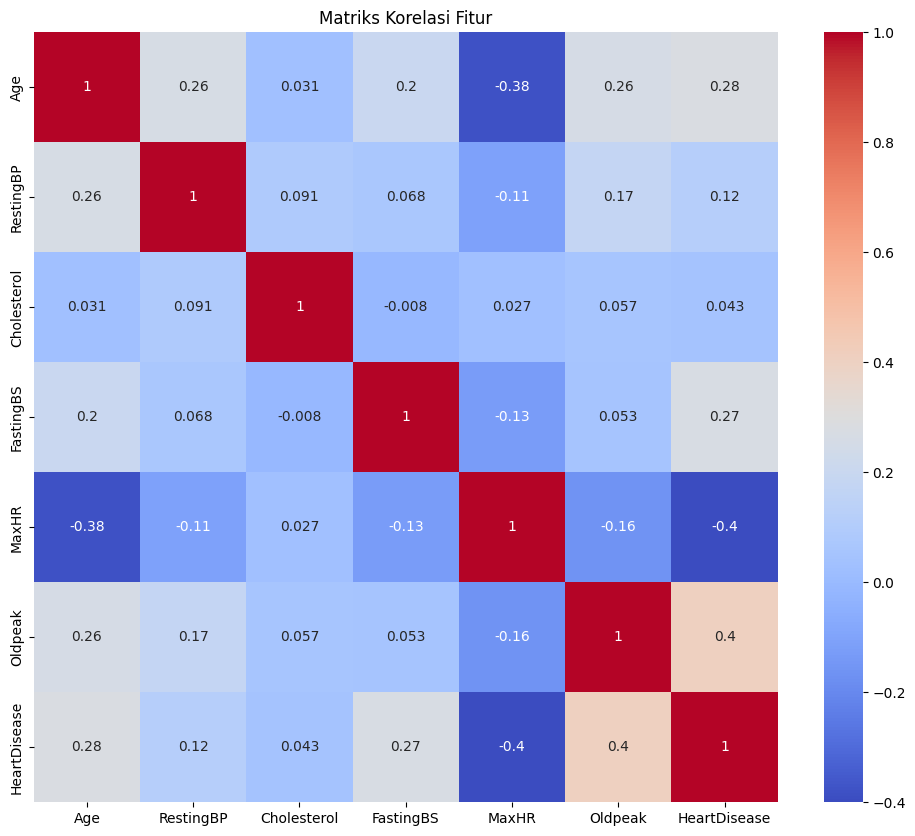

In [91]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12,10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Fitur")
plt.show()

# Data Visualization

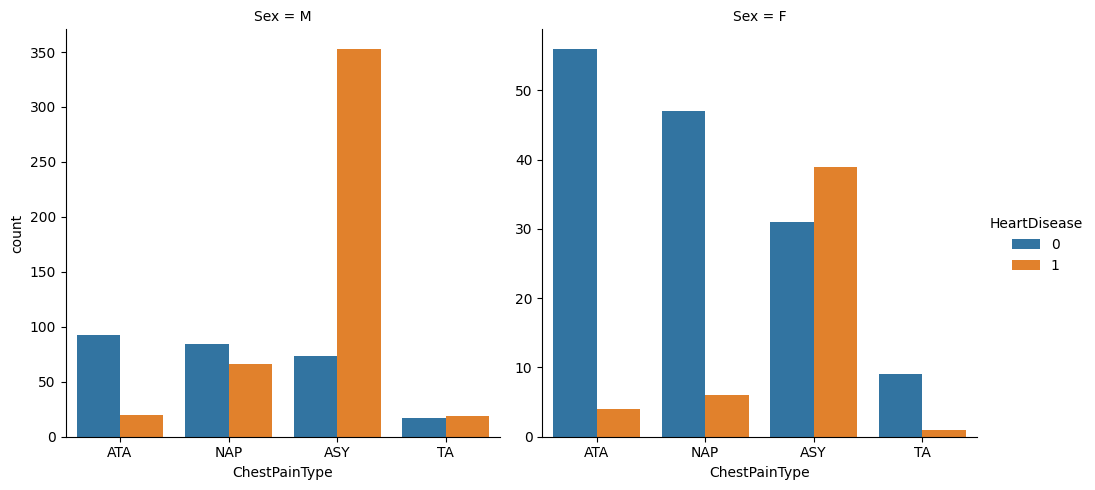

In [92]:
# Visualisasi 1 - ChestPainType vs HeartDisease
sns.catplot(df, x="ChestPainType", hue="HeartDisease", kind="count", col="Sex", sharey=False)

plt.show()

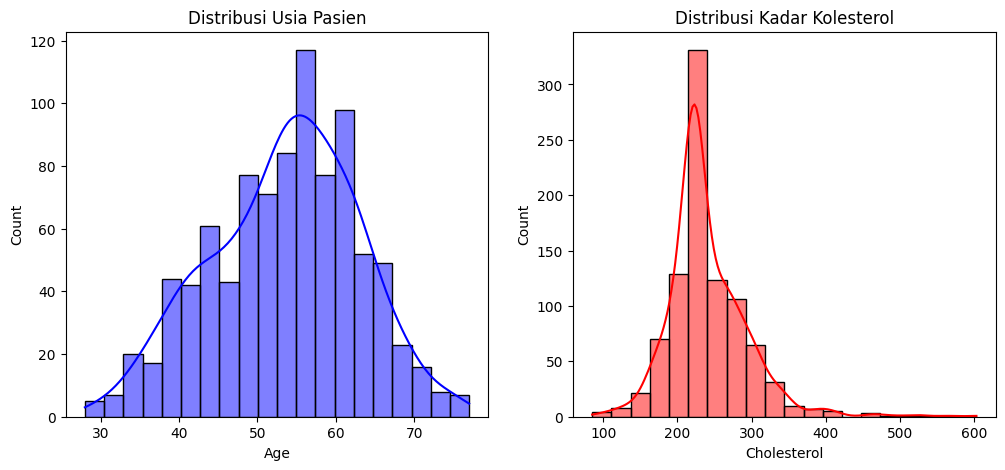

In [93]:
# Visualisasi 2 - Distribusi Age dan Cholesterol
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title("Distribusi Usia Pasien")

plt.subplot(1,2,2)
sns.histplot(df['Cholesterol'], kde=True, bins=20, color='red')
plt.title("Distribusi Kadar Kolesterol")
plt.show()

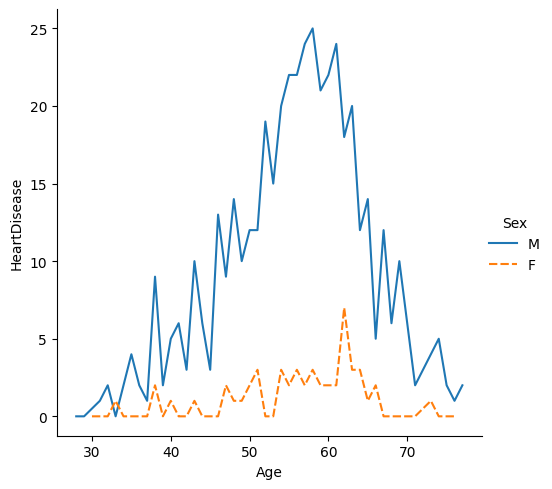

In [94]:
# Visualisasi 3 - 

grouped_df = df.groupby(['Age', 'Sex'], as_index=False)['HeartDisease'].sum()
sns.relplot(
    data=grouped_df,
    x="Age", y="HeartDisease", hue="Sex", style="Sex", kind="line"
)
plt.show()

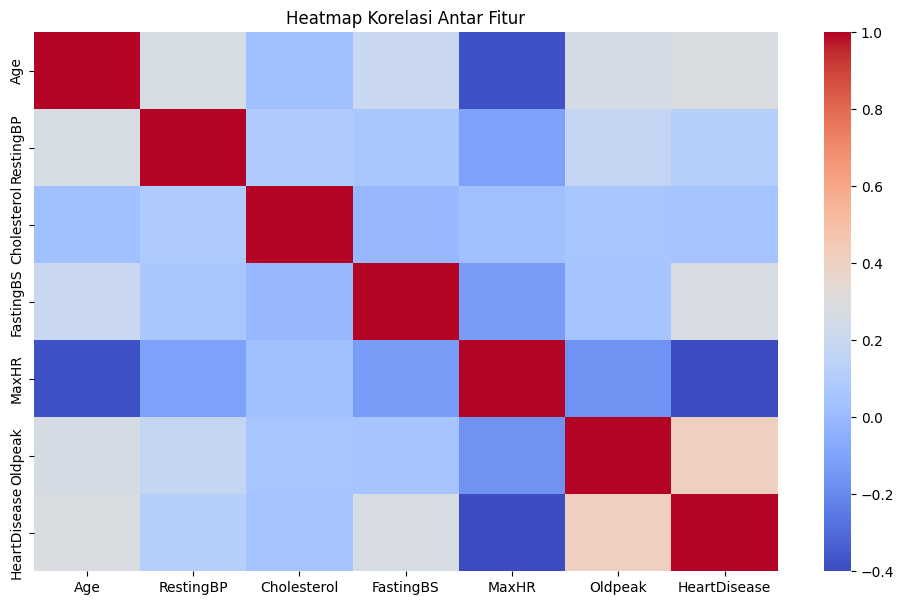

In [95]:
# Visualisasi 4 - Semua Fitur Numerik
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

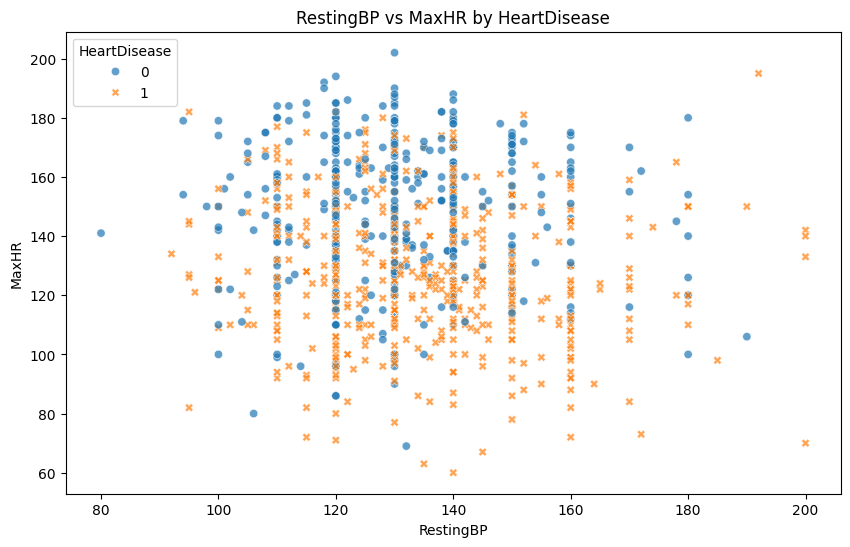

In [96]:
# Visualisasi 5 - RestingBP vs MaxHR dengan HeartDisease sebagai hue
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='RestingBP',
    y='MaxHR',
    hue='HeartDisease',
    style='HeartDisease',
    # palette='coolwarm',
    alpha=0.7
)
plt.title("RestingBP vs MaxHR by HeartDisease")
plt.show()

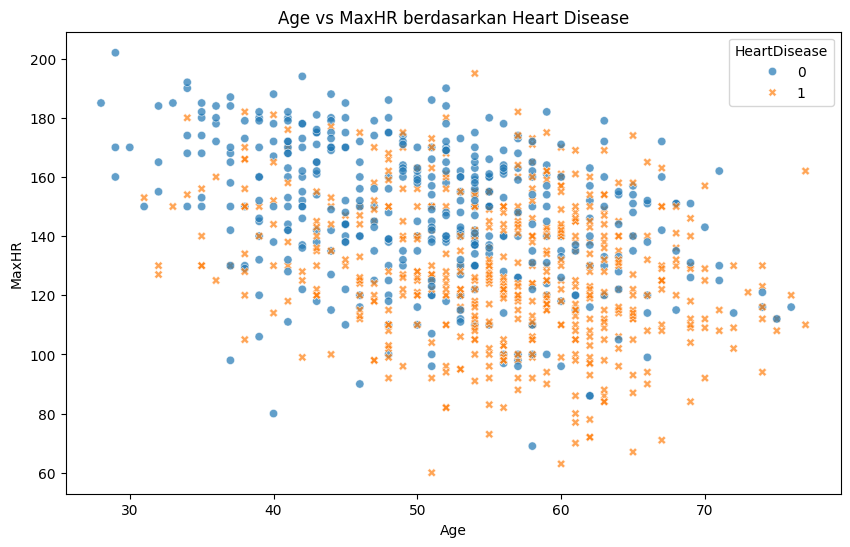

In [97]:
# Visual 6 - Hubungan Age vs MaxHR Based on Target Label
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease', alpha=0.7, style='HeartDisease',)
plt.title("Age vs MaxHR berdasarkan Heart Disease")
plt.show()

## Encoding

In [98]:
categorical_binary = ['Sex', 'ExerciseAngina']
categorical_multiclass = ['ChestPainType', 'RestingECG', 'ST_Slope']

In [99]:
# Label encoding untuk binary
# One-hot encoding untuk multi-class

# Binary to 0/1
for col in categorical_binary:
    df[col] = df[col].astype('category').cat.codes

# One-hot encoding
df = pd.get_dummies(df, columns=categorical_multiclass, drop_first=True)

df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True


# Model Machine Learning

In [100]:
# Target dan fitur
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (918, 15)
y shape: (918,)


In [101]:
y.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [102]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=41,
    stratify=y   # menjaga proporsi kelas
)

print("Train size:", X_train.shape[0])
print("Test size :", X_test.shape[0])

Train size: 734
Test size : 184


In [103]:
y_test.value_counts()

HeartDisease
1    102
0     82
Name: count, dtype: int64

In [104]:
# Scaling Fitur Numerik
scaler = StandardScaler()

# Fit di train, transform train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## Logistic Regression

In [105]:
logreg = LogisticRegression(max_iter=1000, random_state=41)
logreg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,41
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [106]:
# Evaluasi Akurasi
# Prediksi
y_pred = logreg.predict(X_test_scaled)

# Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (Logistic Regression): {acc:.4f}")

Accuracy (Logistic Regression): 0.8967


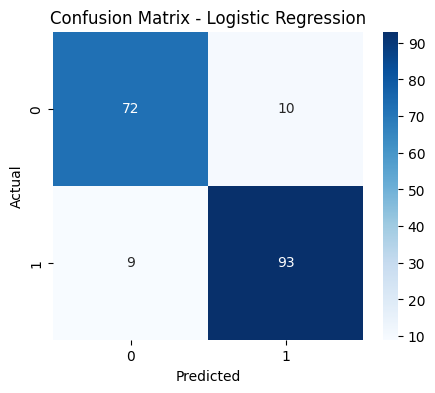


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        82
           1       0.90      0.91      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



In [107]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

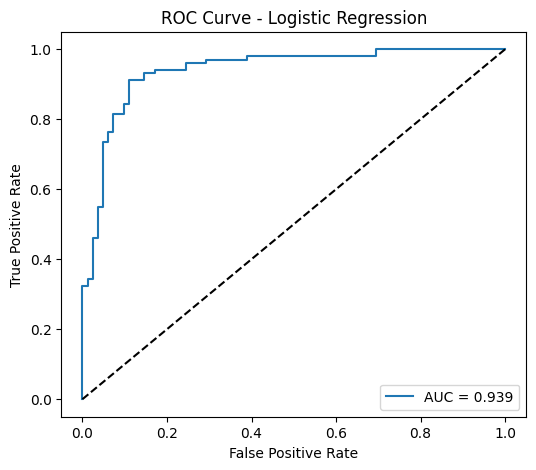

In [108]:
# Probabilitas kelas positif
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Hitung ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')  # garis random
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [109]:
# Model Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=41,
    class_weight="balanced"  # lebih sensitif pada kelas minoritas
)

rf.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf.predict(X_test)

# Evaluasi
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {acc_rf:.4f}")

Accuracy (Random Forest): 0.8913


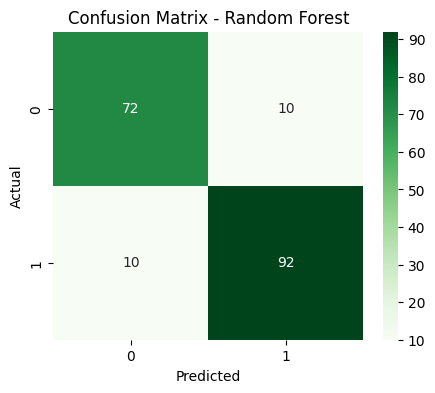


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        82
           1       0.90      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [110]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

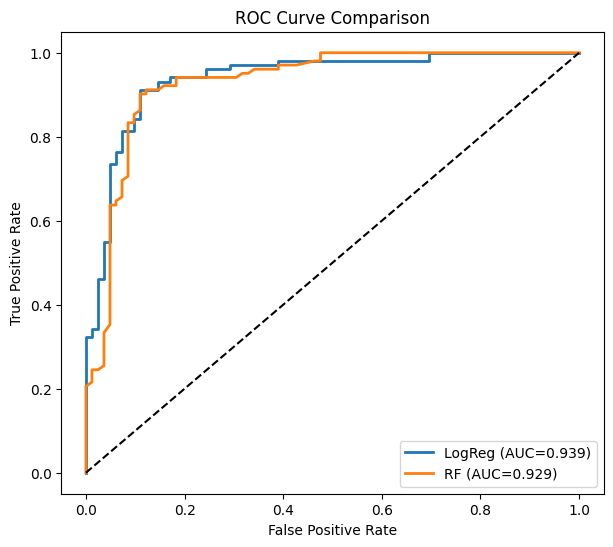

In [111]:
y_proba_rf = rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7,6))

# Logistic Regression (dari kode sebelumnya)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC={roc_auc:.3f})", linewidth=2)

# Random Forest
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC={roc_auc_rf:.3f})", linewidth=2)

plt.plot([0,1], [0,1], "k--")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## XGBoost

In [112]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=41,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost): {acc_xgb:.4f}")

Accuracy (XGBoost): 0.8859


In [113]:
print("\nClassification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))


Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        82
           1       0.90      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [114]:
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
print(f"AUC (XGBoost): {roc_auc_xgb:.4f}")

AUC (XGBoost): 0.9365


## SVM

In [115]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=41)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {acc_svm:.4f}")

print("\nClassification Report - SVM")
print(classification_report(y_test, y_pred_svm))

Accuracy (SVM): 0.8913

Classification Report - SVM
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        82
           1       0.90      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [116]:
print("\nClassification Report - SVM")
print(classification_report(y_test, y_pred_svm))


Classification Report - SVM
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        82
           1       0.90      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [117]:
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print(f"AUC (SVM): {roc_auc_svm:.4f}")

AUC (SVM): 0.9440


## KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {acc_knn:.4f}")

print("\nClassification Report - KNN")
print(classification_report(y_test, y_pred_knn))

Accuracy (KNN): 0.8967

Classification Report - KNN
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        82
           1       0.91      0.90      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [119]:
print("\nClassification Report - KNN")
print(classification_report(y_test, y_pred_knn))


Classification Report - KNN
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        82
           1       0.91      0.90      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [120]:
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC (KNN): {roc_auc_knn:.4f}")

AUC (KNN): 0.9294


# Perbandingan Akurasi Model

In [121]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "SVM", "KNN"],
    "Accuracy": [acc, acc_rf, acc_xgb, acc_svm, acc_knn],
    "AUC": [roc_auc, roc_auc_rf, roc_auc_xgb, roc_auc_svm, roc_auc_knn]
})

comparison

,Model,Accuracy,AUC
0,Logistic Regression,0.896739,0.939144
1,Random Forest,0.891304,0.928563
2,XGBoost,0.885870,0.936514
3,SVM,0.891304,0.944046
4,KNN,0.896739,0.929400
